In [3]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import linregress
import numpy as np
import pandas as pd

In [4]:
# Load vehicle data set into pandas
vehicle_data = pd.read_csv("singapore-motor-vehicle-population.csv")
vehicle_data.head()

,year,type,engine,number
0,2006,Cars,Petrol,471707
1,2006,Cars,Diesel,7
2,2006,Cars,Petrol-Electric,379
3,2006,Cars,Petrol-Electric (Plug-In),0
4,2006,Cars,Petrol-CNG,214


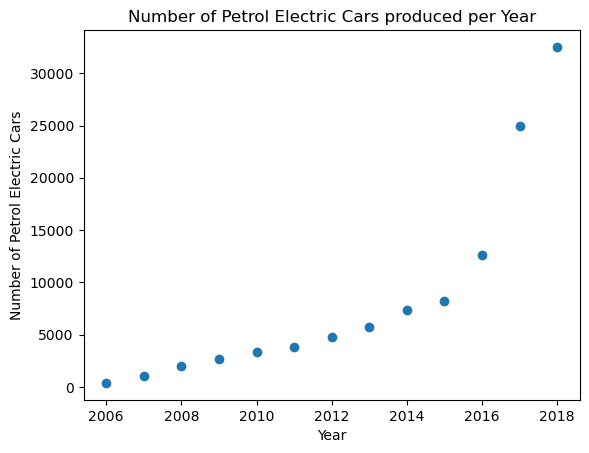

In [10]:
# Generate a scatter plot of year versus number of petrol-electric cars
#Isolate the data
# year = list(set(vehicle_data["year"]))
# year_num = []

# for i in year:
#     year_num.append(int(i))

# year_sorted = sorted(year_num)

# petrol_electric = vehicle_data.loc[vehicle_data["engine"] == "Petrol-Electric", :]
# petrol_electric = petrol_electric[["year", "number"]]
# petrol_electric = petrol_electric[(petrol_electric != 0).all(axis=1)]
# petrol_electric = petrol_electric.groupby("year").sum()

#Isolate the data
year_2 = vehicle_data.loc[(vehicle_data["type"] == "Cars") & (vehicle_data["engine"] == "Petrol-Electric"), "year"]
petrol_electric_2 = vehicle_data.loc[(vehicle_data["type"] == "Cars") & (vehicle_data["engine"] == "Petrol-Electric"), "number"]

#Plot data
plt.scatter(year_sorted_2, petrol_electric_2)
plt.title("Number of Petrol Electric Cars produced per Year")
plt.xlabel("Year")
plt.ylabel("Number of Petrol Electric Cars")

#Save and display figure
plt.savefig("Number of Petrol Electric Cars produced per Year.png")
plt.show()

In [14]:
# Perform a linear regression on year versus petrol-electric cars
(slope, intercept, rvalue, pvalue, stderr) = linregress(year_2, petrol_electric_2)
regress_values = year_2 * slope + intercept

In [15]:
# Create equation of line to calculate predicted number of petrol-electric cars
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

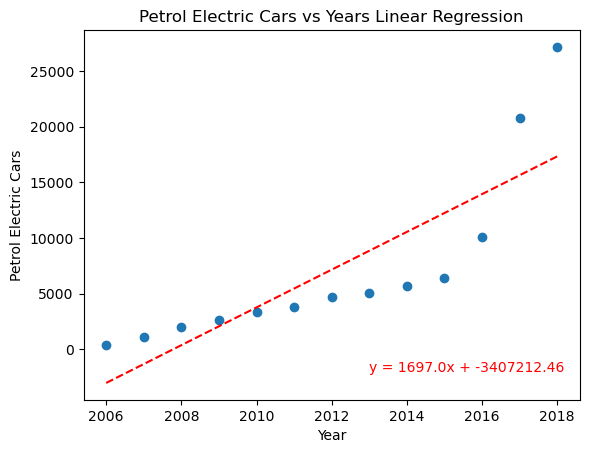

In [25]:
# Plot the linear model on top of scatter plot 
plt.scatter(year_2, petrol_electric_2)
plt.title("Petrol Electric Cars vs Years Linear Regression")
plt.xlabel("Year")
plt.ylabel("Petrol Electric Cars")

#Add the line and regression value
plt.plot(year_2, regress_values, "r--")
plt.text(2013, -2000, f'{line_eq}', color="red")

#Save and display figure
plt.savefig("Petrol Electric Cars vs Years Linear Regression.png")
plt.show()


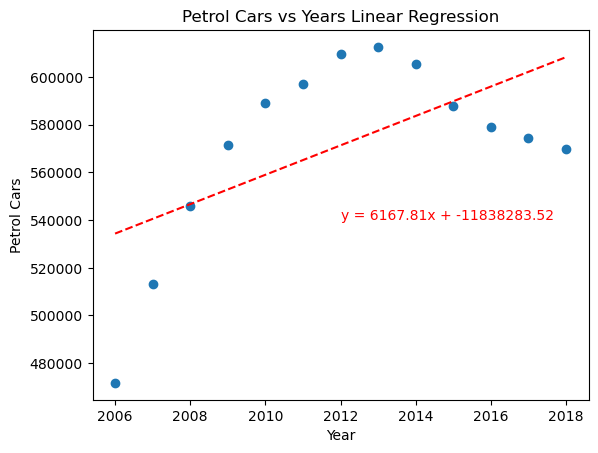

In [28]:
# Repeat plotting scatter and linear model for year versus petrol cars
#Isolate Data
petrol = vehicle_data.loc[(vehicle_data["type"] == "Cars") & (vehicle_data["engine"] == "Petrol"), "number"]

#Perform a linear regression
(slope_p, intercept_p, rvalue_p, pvalue_p, stderr_p) = linregress(year_2, petrol)
regress_values_p = year_2 * slope_p + intercept_p

#Save the line equation
line_eq_p = "y = " + str(round(slope_p, 2)) + "x + " + str(round(intercept_p, 2))

#Plot the data
plt.scatter(year_2, petrol)
plt.title("Petrol Cars vs Years Linear Regression")
plt.xlabel("Year")
plt.ylabel("Petrol Cars")

#Add the linear regression line & equation
plt.plot(year_2, regress_values_p, "r--")
plt.text(2012, 540000, f'{line_eq_p}', color="red")

#Save & display figure
plt.savefig("Petrol Cars vs Years Linear Regression.png")
plt.show()


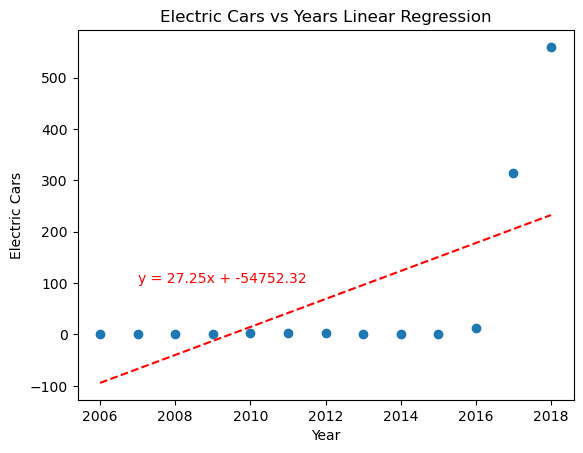

In [32]:
# Repeat plotting scatter and linear model for year versus electric cars
#Isolate Data
electric = vehicle_data.loc[(vehicle_data["type"] == "Cars") & (vehicle_data["engine"] == "Electric"), "number"]

#Perform a linear regression
(slope_e, intercept_e, rvalue_e, pvalue_e, stderr_e) = linregress(year_2, electric)
regress_values_e = year_2 * slope_e + intercept_e

#Save the line equation
line_eq_e = "y = " + str(round(slope_e, 2)) + "x + " + str(round(intercept_e, 2))

#Plot the data
plt.scatter(year_2, electric)
plt.title("Electric Cars vs Years Linear Regression")
plt.xlabel("Year")
plt.ylabel("Electric Cars")

#Add the linear regression line & equation
plt.plot(year_2, regress_values_e, "r--")
plt.text(2007, 100, f'{line_eq_e}', color="red")

#Save & display figure
plt.savefig("Electric Cars vs Years Linear Regression.png")
plt.show()

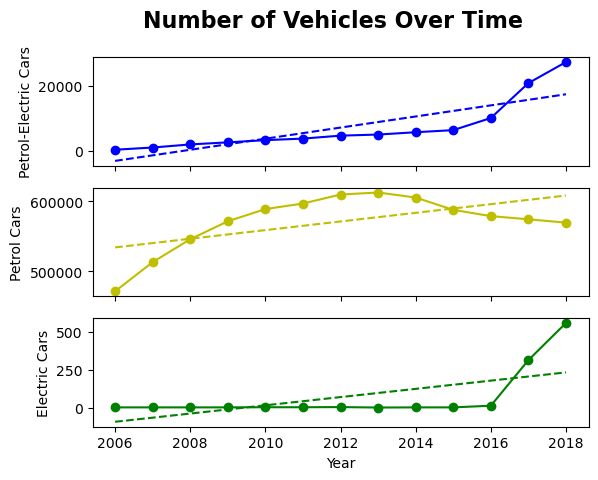

In [38]:
# Generate a facet plot of all 3 figures
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Number of Vehicles Over Time", fontweight="bold", fontsize=16)

ax1.plot(year_2, petrol_electric_2, marker="o", color="blue")
ax1.plot(year_2, regress_values, "b--")
ax1.set_ylabel("Petrol-Electric Cars")

ax2.plot(year_2, petrol, marker="o", color="y")
ax2.plot(year_2, regress_values_p, "y--")
ax2.set_ylabel("Petrol Cars")

ax3.plot(year_2, electric, marker="o", color="green")
ax3.plot(year_2, regress_values_e, "g--")
ax3.set_ylabel("Electric Cars")
ax3.set_xlabel("Year")

plt.show()

In [39]:
# Calculate the number of cars for 2024
year_prediction = 2024
print(f"The number of petrol-electric cars in 2024 will be {round(year_prediction * slope + intercept, 0)}")
print(f"The number of petrol cars in 2024 will be {round(year_prediction * slope_p + intercept_p, 0)}")
print(f"The number of electric cars in 2024 will be {round(year_prediction * slope_e + intercept_e, 0)}")

The number of petrol-electric cars in 2024 will be 27516.0
The number of petrol cars in 2024 will be 645370.0
The number of electric cars in 2024 will be 396.0
